In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import scipy as sp 

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from acquire import get_titanic_data
from prepare import prepare_titanic_data

df = prepare_titanic_data(get_titanic_data())

In [2]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,alone
passenger_id,,,,,,,,,,
0,0,3,1,22.0,1,0,7.2500,2,2,0
1,1,1,0,38.0,1,0,71.2833,0,0,0
2,1,3,0,26.0,0,0,7.9250,2,2,1
3,1,1,0,35.0,1,0,53.1000,2,0,0
4,0,3,1,35.0,0,0,8.0500,2,2,1


In [3]:
# Split into test and train dataframes
train_df, test_df = train_test_split(
    df, test_size=.30, random_state=123, stratify=df[['survived']])

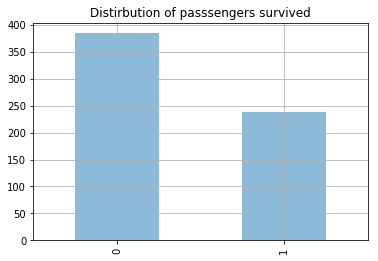

In [4]:
train_df.survived.value_counts().sort_index().plot(kind = "bar",alpha = .5)
plt.title("Distirbution of passsengers survived")
plt.grid(b = True , which = "major")

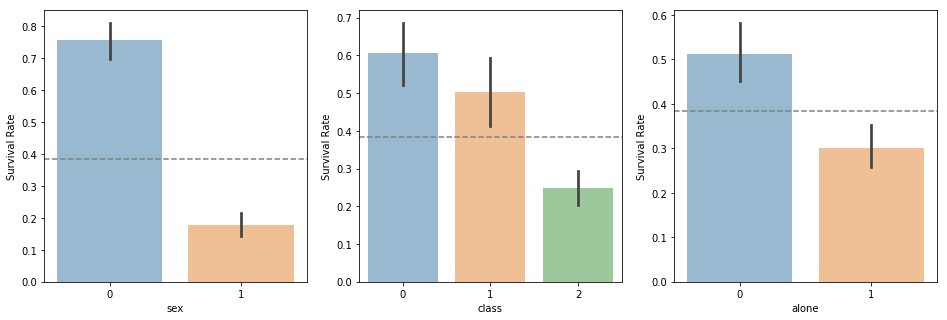

In [5]:
features = ['sex', 'class', 'alone']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

survival_rate = train_df.survived.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'survived', data=train_df, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Survival Rate')
    ax[i].axhline(survival_rate, ls='--', color='grey')

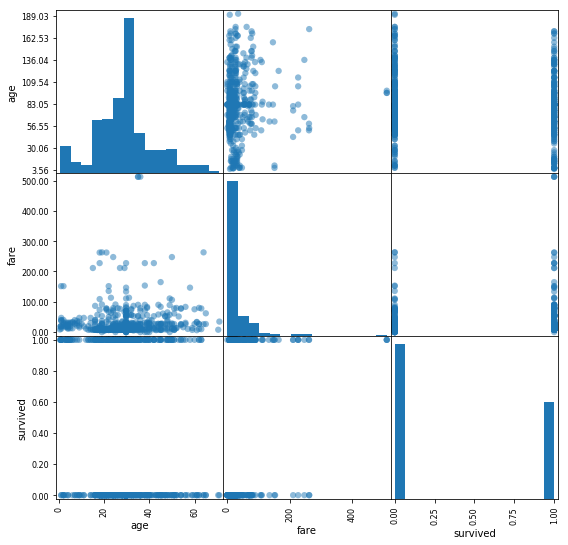

In [6]:
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter

cmap = cm.get_cmap('gnuplot')
axes = pd.plotting.scatter_matrix(
    train_df[['age','fare','survived']], marker='o', s=40,
    hist_kwds={'bins':15},  figsize=(9,9), cmap=cmap)
for ax in axes.flatten():
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# axes = pd.plotting.scatter_matrix(df, alpha=0.3, figsize=(9,9), diagonal='kde')
# for ax in axes.flatten():
#    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f')) 

In [7]:
# Compare two groups: Is the age of survivors significantly different from that of the non-survivors?
#     H0: the difference in age between subset A, survivors, and subset B, non-survivors, is insubstantial (basically 0)
#     Ha: the difference between subset A, survivors, and subset B, non-survivors is substantial
#     We will test if the observations with survivors (subset A) has significantly different measures of Age than the observations of non-survivors (subset B).
#     If there is difference, then variable Age is a good choice to keep as a feature.
#     We can use a t-test here, as Age is somwhat normally distributed.

# is the t-statistic < -1.96 or > 1.96?  if so, then look at p-value to ensure it is less than our alpha of .05.

sp.stats.ttest_ind(
    train_df[train_df.survived == 1].age.dropna(),
    train_df[train_df.survived == 0].age.dropna())

# We fail to confirm the null hypothesis' that there is no difference in Age between those who survived and those who did not. In other words, Age seems to play a part in Survived rate.

Ttest_indResult(statistic=-1.6153410127174097, pvalue=0.10674477621551516)

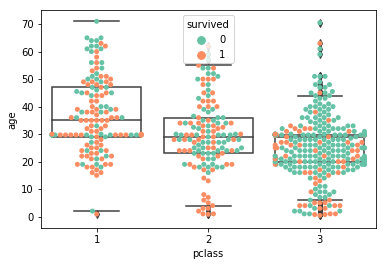

In [8]:
# Looks like 1st class had a good amount of survivorship.
sns.swarmplot(x="pclass", y="age", data=train_df, hue="survived", palette="Set2")
ax = sns.boxplot(x="pclass", y="age", data=train_df,
        showcaps=True,boxprops={'facecolor':'None'},
        showfliers=True,whiskerprops={'linewidth':0})


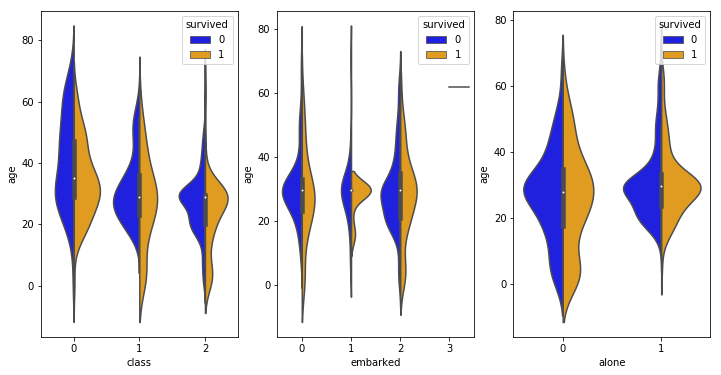

In [9]:
# 3. violin plot
features = ['class', 'embarked', 'alone']
feature_count = range(len(features))

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,6))

for i, feature in enumerate(features):
    sns.violinplot(feature, 'age', hue='survived',
        data=train_df, split=True, ax=ax[i], palette=['blue','orange'])

In [10]:
pd.crosstab(train_df.pclass, train_df.survived, margins=True).style.background_gradient(cmap='YlOrRd')

survived,0,1,All
pclass,,,
1,55,85,140
2,66,67,133
3,263,87,350
All,384,239,623


In [11]:
train_df.fare.describe()

count    623.000000
mean      31.634884
std       52.533832
min        0.000000
25%        7.895800
50%       13.791700
75%       30.285400
max      512.329200
Name: fare, dtype: float64

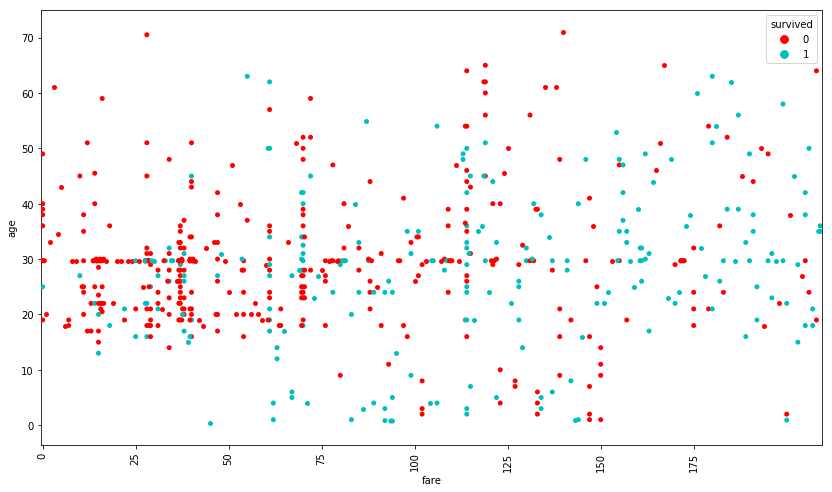

In [12]:
plt.figure(figsize=(14,8))

p = sns.swarmplot(x='fare', y='age', hue='survived',
                  palette=["r", "c"], data=train_df)


loc = plt.xticks(list(range(0,200,25)))
p.set_xticklabels(labels=list(range(0,200,25)), rotation=90, fontsize=10)

plt.show()


## Multiple continuous variables through melting

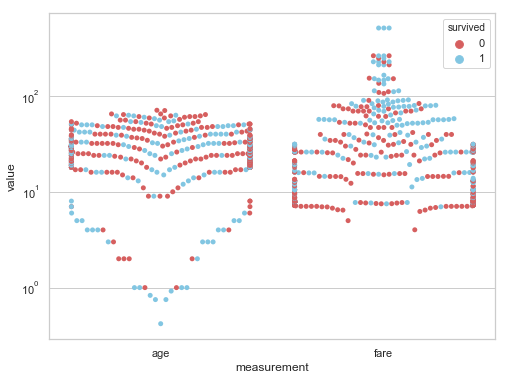

In [16]:
# Multiple continuous variables through melting

sns.set(style="whitegrid", palette="muted")

# "Melt" the dataset to "long-form" representation
df_melt = pd.melt(train_df[['survived','age','fare']], "survived", var_name="measurement")

plt.figure(figsize=(8,6)) 
# Draw a categorical scatterplot to show each observation
p = sns.swarmplot(x="measurement", y="value", hue="survived",
              palette=["r", "c", "y"], data=df_melt)
p.set(yscale="log")
    
plt.show()
